<h2><center>ASSIGNMENT 2</center></h2>
<h2><center>DEEP ASHISH JARIWALA, JAYDEEP SINGH</center></h2>
<h2><center>GROUP - 31</center></h2>
<h2><center>Q: CM4</center></h2>

## SEED DATASET

#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from mlxtend.plotting import plot_confusion_matrix

#### IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines= True)
dataset.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
dataset.head(5)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


<p>To construct the data, seven geometric parameters of wheat kernels were measured:<p>
<ul>
            <li>area A.</li>
            <li>perimeter P.</li>
            <li>compactness C = 4*pi*A/P^2.</li>
            <li>length of kernel.</li>
            <li>width of kernel.</li>
            <li>asymmetry coefficient.</li>
            <li>length of kernel groove.</li>
            <li>target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3).</li>
</ul>

#### EXPLORATORY DATA ANALYSIS

C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


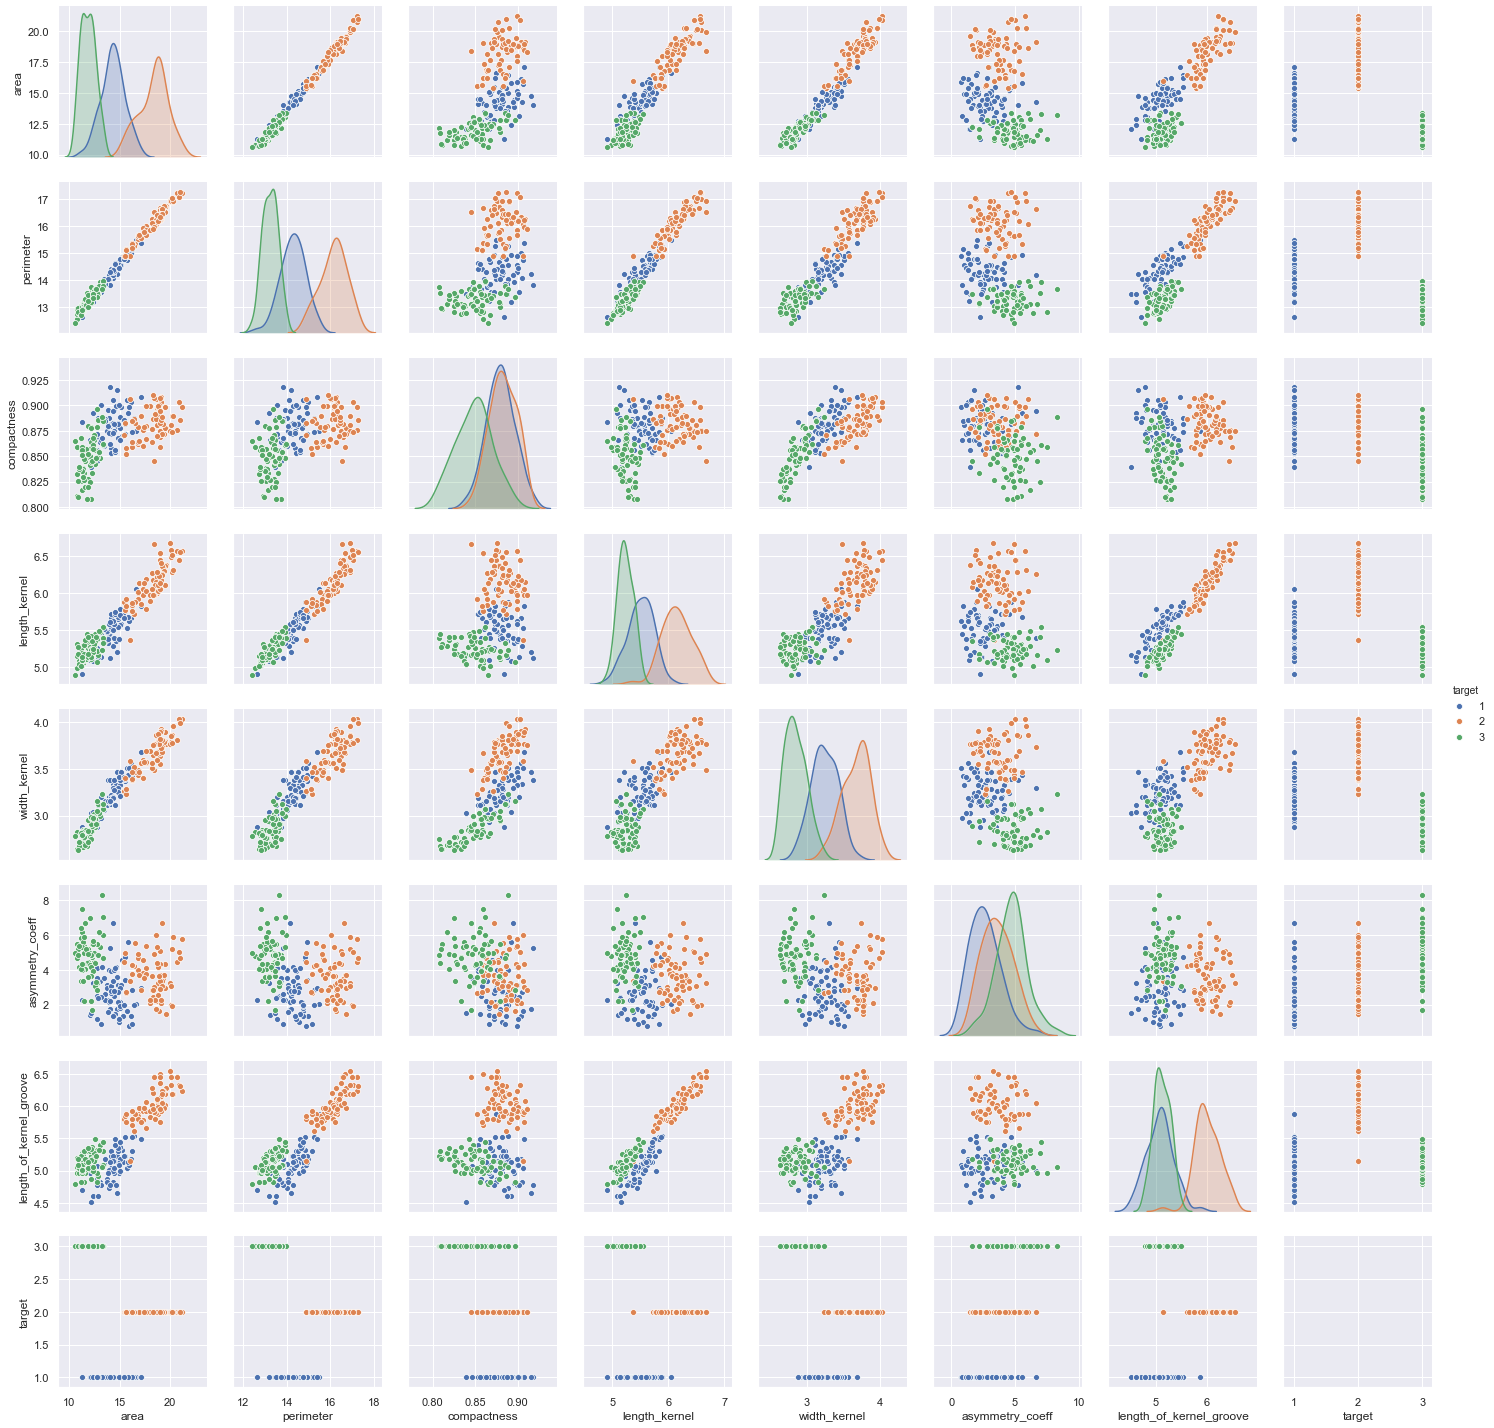

In [3]:
sns.pairplot(dataset, hue = 'target')

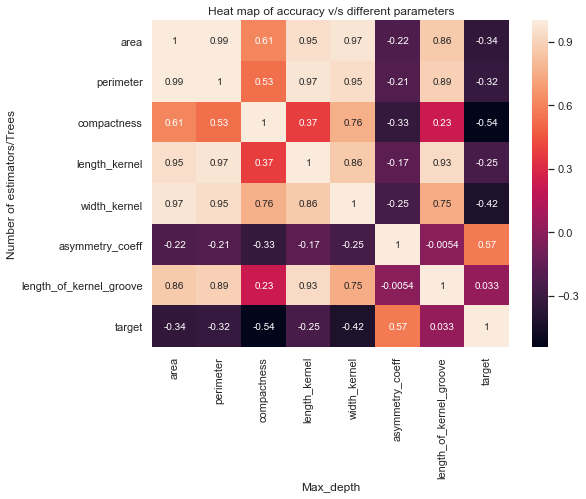

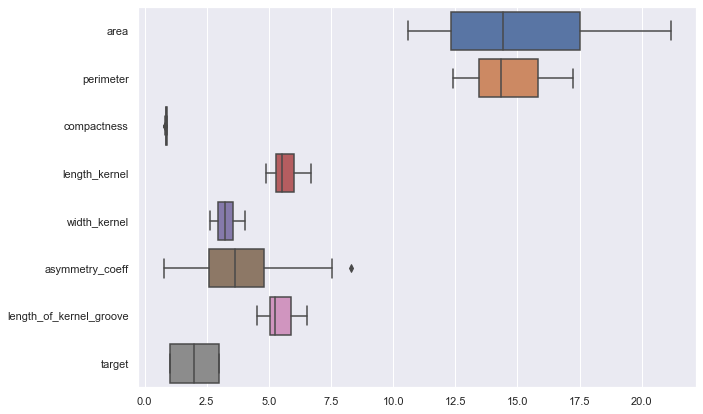

In [4]:
correlation_data = dataset.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_data, annot= True, cbar= True)
plt.xlabel("Max_depth")
plt.ylabel("Number of estimators/Trees")
plt.title("Heat map of accuracy v/s different parameters")


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = dataset, orient='h', ax=ax)

<p>The following steps are performed as a part of preprocessing the dataset into training set. All the important statistical observations are also included.</p>
<ul>
            <li>All the missing and irregular values are removed by read_csv command using the parameter error_bad_lines.</li>
            <li>The dataset was clean with only single outlier in asymmetric coefficient which has not been changed as this does not impact the accuracy on a large scale.</li>
            <li>Many variables like Area,Perimeter,length and width were strongly correlated. The correlation of target was strongest with asymmetric_coeff and high negative correlation with compactness.</li>
</ul>

####  DATA  PREPROCESSING 

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<p> The dataset is splited into training and test using train_test_split method in sklearn. 80% dataset is used for training and then applied to grid search cv(using 10 fold cross validation) to tune the best parameters. The best tuned parameters are used to train the model again and is tested on the 20% test set seperated to get the final accuracy. All the splits and algorithm used are applied with random_state = 0.</p>

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X)

<p>The training set is normalized using the standard scaling function. Validation score for both scaled and non scaled dataset is reported to select the best. We have trained both the dataset (with and without normailzation) to check the best performance on validation set.</p>

#### TRAINING THE DATASET AND APPLYING GRID_SEARCH_CV METHOD WITHOUT NORMALIZING DATA 

In [7]:
nbclassifier = GaussianNB()
nbclassifier.fit(X, y)

var_before = nbclassifier.sigma_

cv = KFold(n_splits=10, random_state=0, shuffle=True)
parameters = [{'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}]
grid_search = GridSearchCV(estimator = nbclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.33 %
Best Parameters: {'var_smoothing': 0.001}


<p>The box above shows GRID_SEARCH_CV method to find the best parameters. This method utilizes the concept of K-fold cross validation to evaluate the model on different parameters. This case involves tuning of variable smoothing. The best parameter obtained for this case is: var_smoothing = 0.001. The box below shows all the results (for all the folds, mean accuracy, ranked test score among all the splits and computation time for grid search parameter tuning).</p>

In [8]:
results

{'mean_fit_time': array([0.00229037, 0.00230937, 0.00190792, 0.00174303, 0.00193398]),
 'std_fit_time': array([0.0008756 , 0.00093991, 0.00036676, 0.00035454, 0.00034738]),
 'mean_score_time': array([0.00057979, 0.00099394, 0.0009129 , 0.0009217 , 0.00087945]),
 'std_score_time': array([0.00059254, 0.0002061 , 0.00049381, 0.00031339, 0.00041639]),
 'param_var_smoothing': masked_array(data=[1e-10, 1e-09, 1e-05, 0.001, 0.1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'var_smoothing': 1e-10},
  {'var_smoothing': 1e-09},
  {'var_smoothing': 1e-05},
  {'var_smoothing': 0.001},
  {'var_smoothing': 0.1}],
 'split0_test_score': array([1., 1., 1., 1., 1.]),
 'split1_test_score': array([0.8125, 0.8125, 0.8125, 0.875 , 0.8125]),
 'split2_test_score': array([0.875 , 0.875 , 0.875 , 0.9375, 0.875 ]),
 'split3_test_score': array([1.    , 1.    , 1.    , 1.    , 0.9375]),
 'split4_test_score': array([1., 1., 1., 1., 1.]),
 

Text(0.5, 1.0, 'Graph of validation accuracy v/s variable smoothing')

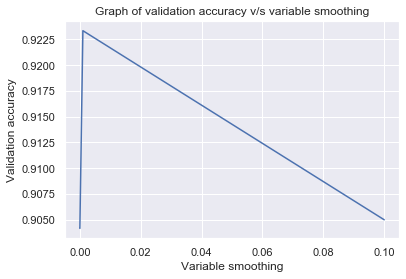

In [9]:
mean_accuracy = grid_search.cv_results_['mean_test_score']
varsm = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]

sns.lineplot(varsm, mean_accuracy)
plt.xlabel("Variable smoothing")
plt.ylabel("Validation accuracy")
plt.title("Graph of validation accuracy v/s variable smoothing")

<p>The graph above shows the variation of mean validation accuracy with change in var_smoothing parameter. The best accuracy is observed at var_smoothing = 0.001.</p> 

#### TRAINING THE DATASET AND APPLYING GRID_SEARCH_CV METHOD WITH NORMALIZING THE DATASET 

In [10]:
nbclassifier = GaussianNB()
nbclassifier.fit(X_train_scaled, y)

cv = KFold(n_splits=10, random_state=0, shuffle=True)
parameters = [{'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}]
grid_search = GridSearchCV(estimator = nbclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X_train_scaled, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.50 %
Best Parameters: {'var_smoothing': 0.1}


<p>The box above shows GRID_SEARCH_CV method to find the best hyperparameters. This method utilizes the concept of K-fold cross validation to evaluate the model on different hyperparamters. This case involves tuning of variable smoothing. The best parameter obtained for this case is: var_smoothing = 0.1. The box below shows all the results (for all the folds, mean accuracy, ranked test score among all the splits and computation time for grid search hyperparameter tuning).</p>

In [11]:
results

{'mean_fit_time': array([0.00216656, 0.00234747, 0.00200369, 0.00215466, 0.00178711]),
 'std_fit_time': array([0.00038171, 0.00077838, 0.00063813, 0.00077203, 0.00059279]),
 'mean_score_time': array([0.00082645, 0.00107751, 0.0012089 , 0.00101235, 0.00108082]),
 'std_score_time': array([0.00035555, 0.00068539, 0.00039133, 0.0006032 , 0.00022386]),
 'param_var_smoothing': masked_array(data=[1e-10, 1e-09, 1e-05, 0.001, 0.1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'var_smoothing': 1e-10},
  {'var_smoothing': 1e-09},
  {'var_smoothing': 1e-05},
  {'var_smoothing': 0.001},
  {'var_smoothing': 0.1}],
 'split0_test_score': array([1., 1., 1., 1., 1.]),
 'split1_test_score': array([0.8125, 0.8125, 0.8125, 0.8125, 0.75  ]),
 'split2_test_score': array([0.875, 0.875, 0.875, 0.875, 0.875]),
 'split3_test_score': array([1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1.]),
 'split5_test_score': arra

Text(0.5, 1.0, 'Graph of validation accuracy v/s variable smoothing')

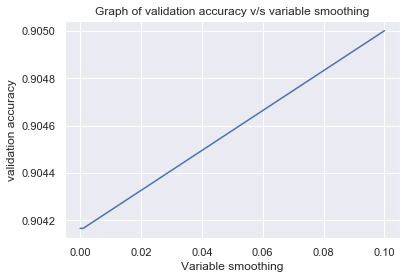

In [12]:
mean_accuracy = grid_search.cv_results_['mean_test_score']
varsm = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]

sns.lineplot(varsm, mean_accuracy)
plt.xlabel("Variable smoothing")
plt.ylabel("validation accuracy")
plt.title("Graph of validation accuracy v/s variable smoothing")

<p>The graph above shows the variation of mean validation accuracy with change in var_smoothing parameter. The best accuracy is observed at var_smoothing = 0.1. The normalized dataset requires more var_smoothing compared to without normalization.</p>

<p>The table below shows a breif comparison of validation accuracy with and without normalization of dataset.</p>
<table>
  <tr>
    <th>Normalization applied</th>
    <th>Validation Accuracy</th>
    <th>Best paramters</th>
  </tr>
  <tr>
    <td>Yes</td>
    <td>90.50%</td>
    <td>var_smoothing = 0.1</td>
   </tr>
  <tr>
    <td>No</td>
    <td>92.33%</td>
    <td>var_smoothing = 0.001</td>
   </tr>
</table>
<p>A high accuracy is observed in case when normalization is not applied on training dataset. Therefore we will compute test-accuracy without normalizing data.</p>

#### TEST SET ACCURACY

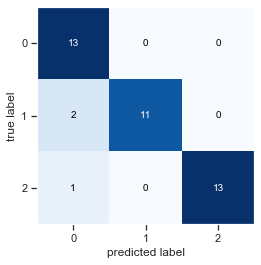

The accuracy obtained on test set with best tuned parameters: 92.5 % 


In [13]:
nbclassifier_final = GaussianNB(var_smoothing = 0.001)
nbclassifier_final.fit(X, y)

var_after = nbclassifier_final.sigma_

y_pred = nbclassifier_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"The accuracy obtained on test set with best tuned parameters: {ac*100} % ")

#### Parameters learned by the NB Classifier: (to be used in CM6 analysis)

In [14]:
# number of training samples observed in each class.
print(f"nbclassifier_final.class_count_: {nbclassifier_final.class_count_}\n")


# probability of each class.
print(f"nbclassifier_final.class_prior_: {nbclassifier_final.class_prior_}\n")


# class labels known to the classifier
print(f"nbclassifier_final.classes_: {nbclassifier_final.classes_}\n")


# mean of each feature per class
print(f"nbclassifier_final.theta_: {nbclassifier_final.theta_}\n")


# variance of each feature per class
print(f"nbclassifier_final.sigma_: {nbclassifier_final.sigma_}\n")


# absolute additive value to variances
print(f"nbclassifier_final.epsilon_: {nbclassifier_final.epsilon_}\n")

nbclassifier_final.class_count_: [52. 55. 51.]

nbclassifier_final.class_prior_: [0.32911392 0.34810127 0.32278481]

nbclassifier_final.classes_: [1 2 3]

nbclassifier_final.theta_: [[14.28269231 14.26884615  0.88000577  5.49938462  3.24076923  2.75613846
   5.08213462]
 [18.47509091 16.20672727  0.88255818  6.18145455  3.68961818  3.66296364
   6.04552727]
 [11.92980392 13.26666667  0.85106078  5.23572549  2.86598039  4.59947059
   5.11607843]]

nbclassifier_final.sigma_: [[1.47875621 0.33480059 0.00900017 0.06201897 0.04070806 1.68445565
  0.07707704]
 [1.92666615 0.34365953 0.0089558  0.06643817 0.04222245 1.45014661
  0.05757769]
 [0.48677014 0.11978259 0.0091581  0.02713382 0.0283718  1.60318485
  0.03533927]]

nbclassifier_final.epsilon_: 0.00872115465870854



In [26]:
df_1

,index,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove
0,class1,14.282692,14.268846,0.880006,5.499385,3.240769,2.756138,5.082135
1,class2,18.475091,16.206727,0.882558,6.181455,3.689618,3.662964,6.045527
2,class3,11.929804,13.266667,0.851061,5.235725,2.865980,4.599471,5.116078


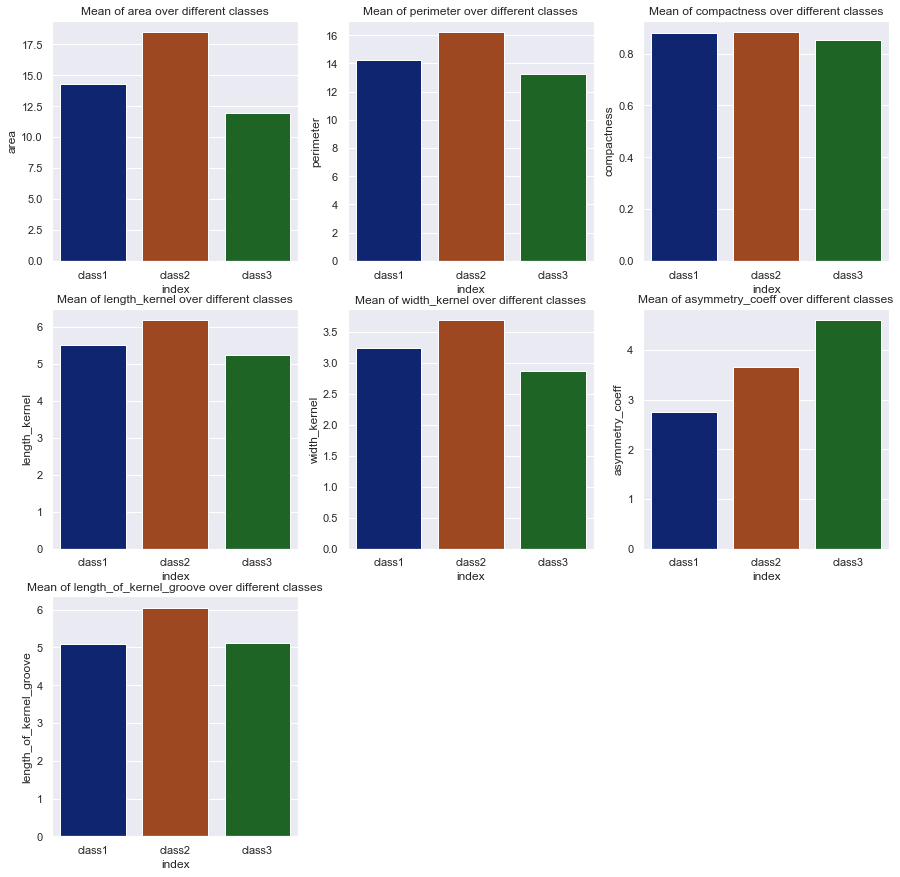

#### TABLE TO SHOW THE CHANGE IN VARIANCE AFFECTED BY VAR_SMOOTHING

In [16]:
var = var_after - var_before
df = pd.DataFrame(var, index = ['class 1','class 2','class 3'], columns = dataset.columns[:-1])
print(df)

             area  perimeter  compactness  length_kernel  width_kernel  \
class 1  0.008721   0.008721     0.008721       0.008721      0.008721   
class 2  0.008721   0.008721     0.008721       0.008721      0.008721   
class 3  0.008721   0.008721     0.008721       0.008721      0.008721   

         asymmetry_coeff  length_of_kernel_groove  
class 1         0.008721                 0.008721  
class 2         0.008721                 0.008721  
class 3         0.008721                 0.008721  


<p>The above table shows the change in variance for all the features and classes with the change in var_smoothing paramter from 1e-9 to 0.001. We can see a change of 0.008721 in all the features, which indicates the stabilization provided in calculation of prior probabilities. Moreover, it increases the variance to make it a better estimator.</p>
<p>The var_smoothing parameter provides the portion of the largest variance of the features, that can be added based on the value in order to stabilize calculation linked with prior probabilities. This essentially widens (or "smooths") the curve and accounts for more samples that are further away from the distribution mean. Moreover, higher the variance between two features the less correlational and better estimator since Naive Bayes assumes that samples are i.i.d.</p> 

<h2>References</h2>

<a>https://scikit-learn.org/stable/modules/naive_bayes.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html</a>

<a>http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/</a>

<a>https://stackoverflow.com/questions/58046129/can-someone-give-a-good-math-stats-explanation-as-to-what-the-parameter-var-smoo</a>

<a>http://seaborn.pydata.org/</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html</a>

<a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html</a>